In [ ]:
pip install wooldridge

In [ ]:
pip install stargazer

# EJERCICIOS EN COMPUTADORA

## Problema 1

In [ ]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wooldridge import data
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
from wooldridge import data as wd_data

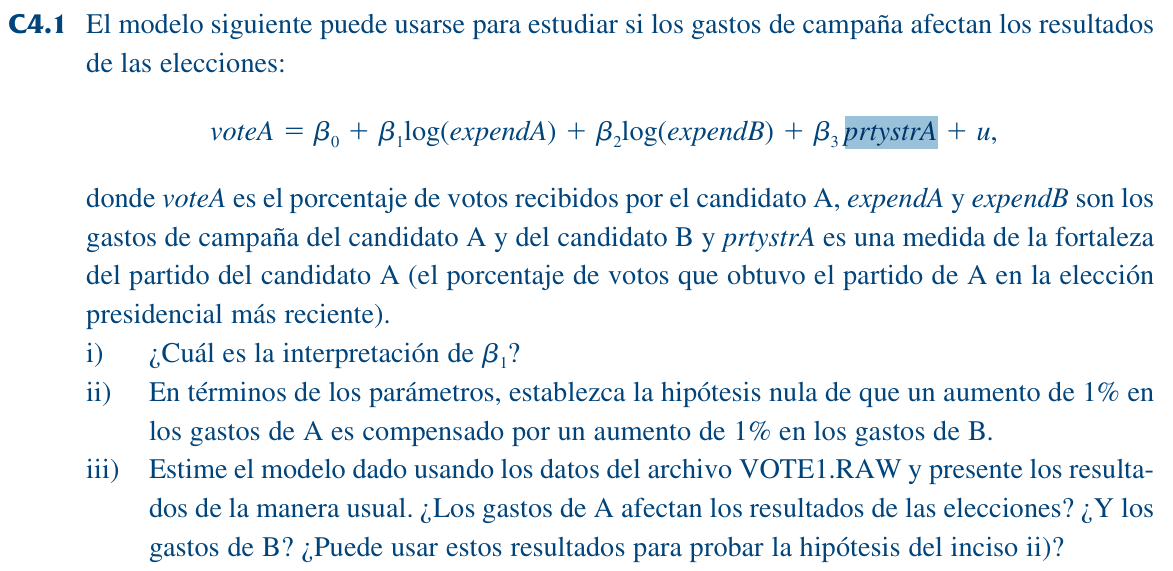

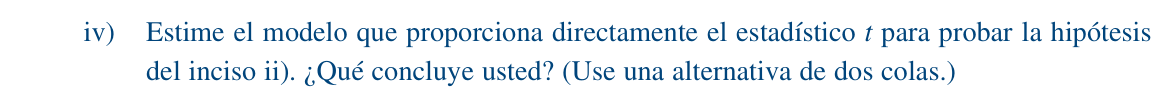

In [ ]:
# Carga de datos desde el paquete wooldridge
data = wd_data("vote1")

In [ ]:
# Logaritmos de las variables relevantes
data['log_expendA'] = np.log(data['expendA'])
data['log_expendB'] = np.log(data['expendB'])
data['log_prtystrA'] = np.log(data['prtystrA'])

In [ ]:
# Variables dependiente e independientes
y = data['voteA']
X = data[['log_expendA', 'log_expendB', 'log_prtystrA']]
X = sm.add_constant(X)

In [ ]:
# Estimación del modelo
model = sm.OLS(y, X).fit()

In [ ]:
# Resultados del modelo
print("Resultados del modelo:")
print(model.summary())

Resultados del modelo:
                            OLS Regression Results                            
Dep. Variable:                  voteA   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     214.9
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           1.95e-57
Time:                        23:58:17   Log-Likelihood:                -596.96
No. Observations:                 173   AIC:                             1202.
Df Residuals:                     169   BIC:                             1215.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           25.6135  

In [ ]:
# Interpretación de coeficientes
b1 = model.params['log_expendA']
b2 = model.params['log_expendB']
print(f"\nCoeficiente de log(expendA) (b1): {b1:.4f}")
print(f"Coeficiente de log(expendB) (b2): {b2:.4f}")


Coeficiente de log(expendA) (b1): 6.0836
Coeficiente de log(expendB) (b2): -6.6370


In [ ]:
# Prueba de hipótesis H0: b1 = -b2
# Cálculo del estadístico t para la hipótesis compuesta
hypothesis_matrix = np.array([1, -1, 0, 0])  # Coeficientes: b1 - b2 = 0
test = model.t_test(hypothesis_matrix)

In [ ]:
print("\nPrueba de hipótesis H0: b1 + b2 = 0")
print(f"Estadístico t: {test.statistic[0][0]:.4f}")
print(f"p-value: {test.pvalue:.4f}")


Prueba de hipótesis H0: b1 + b2 = 0
Estadístico t: 1.7325
p-value: 0.0850
